In [ ]:
#
# This file is part of Celestial (https://github.com/OpenFogStack/celestial).
# Copyright (c) 2024 Tobias Pfandzelter, The OpenFogStack Team.
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, version 3.
#
# This program is distributed in the hope that it will be useful, but
# WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU
# General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program. If not, see <http://www.gnu.org/licenses/>.
#

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

sns.set(font_scale=0.9, style='whitegrid', font='CMU Sans Serif')
pal = sns.color_palette(['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB'])
sns.set_palette(pal)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['figure.figsize'] = (4.5,2)
mpl.rcParams['figure.dpi'] = 100

In [4]:
OUTPUT_DIR = "output"
RESULTS_FILE = "results.csv"

In [5]:
results = pd.read_csv(RESULTS_FILE)

results["expected_before"] = (
    results["expected_before"]
    .apply(lambda x: float(x) if x != "False" else np.nan)
    .astype(float)
)

results["expected_after"] = (
    results["expected_after"]
    .apply(lambda x: float(x) if x != "False" else np.nan)
    .astype(float)
)

results["expected_avg"] = (
    results["expected_before"] + results["expected_after"]
) / 2

results["actual"] = (
    results["actual"]
    .apply(lambda x: float(x) if x != "False" else np.nan)
    .astype(float)
)

results["a_shell"] = results["a_shell"].astype(int).astype(str)
results["b_shell"] = results["b_shell"].astype(int).astype(str)
results["b_sat"] = results["b_sat"].astype(int).astype(str)

results["diff"] = np.abs(results["actual"] - results["expected_avg"])

# make a column a with a_shell-a_sat as a string
results["a"] = results.apply(lambda x: f"{x['a_shell']}-{x['a_sat']}", axis=1)
# same with b
results["b"] = results.apply(lambda x: f"{x['b_shell']}-{x['b_sat']}", axis=1)

In [6]:
results

,a_shell,a_sat,t,b_shell,b_sat,expected_before,expected_after,actual,expected_avg,diff,a,b
0,0,0,1.698314e+09,0,0,0.0,0.0,0.406027,0.0,0.406027,0-0,0-0
1,0,0,1.698314e+09,0,1,0.0,0.0,47.983408,0.0,47.983408,0-0,0-1
2,0,0,1.698314e+09,0,2,0.0,0.0,68.630457,0.0,68.630457,0-0,0-2
3,0,0,1.698314e+09,0,3,0.0,0.0,107.501984,0.0,107.501984,0-0,0-3
4,0,0,1.698314e+09,0,4,0.0,0.0,125.101805,0.0,125.101805,0-0,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...
104736,1,9,1.698314e+09,1,23,0.0,0.0,NaN,0.0,NaN,1-9,1-23
104737,1,9,1.698314e+09,1,24,0.0,0.0,NaN,0.0,NaN,1-9,1-24
104738,1,9,1.698314e+09,1,25,0.0,0.0,NaN,0.0,NaN,1-9,1-25
104739,1,9,1.698314e+09,1,26,0.0,0.0,NaN,0.0,NaN,1-9,1-26


In [7]:
results.groupby(["a", "b"]).mean().reset_index()

/var/folders/2f/b2y6thfs2051_m0fs57vb_sc0000gn/T/ipykernel_52709/3492861575.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results.groupby(["a", "b"]).mean().reset_index()


,a,b,a_sat,t,expected_before,expected_after,actual,expected_avg,diff
0,0-0,0-0,0.0,1.698314e+09,0.0,0.0,0.402996,0.0,0.402996
1,0-0,0-1,0.0,1.698314e+09,0.0,0.0,36.153793,0.0,36.153793
2,0-0,0-10,0.0,1.698314e+09,0.0,0.0,37.695646,0.0,37.695646
3,0-0,0-11,0.0,1.698314e+09,0.0,0.0,64.949214,0.0,64.949214
4,0-0,0-12,0.0,1.698314e+09,0.0,0.0,107.419431,0.0,107.419431
...,...,...,...,...,...,...,...,...,...
14395,1-9,1-59,9.0,1.698314e+09,0.0,0.0,112.562895,0.0,112.562895
14396,1-9,1-6,9.0,1.698314e+09,0.0,0.0,113.385439,0.0,113.385439
14397,1-9,1-7,9.0,1.698314e+09,0.0,0.0,90.432962,0.0,90.432962
14398,1-9,1-8,9.0,1.698314e+09,0.0,0.0,63.562473,0.0,63.562473


In [8]:
results_2d = (
    results.groupby(["a", "b"])
    .mean(numeric_only=True)
    .reset_index()
    .pivot(index="a", columns="b", values="diff")
)
results_2d

b,0-0,0-1,0-10,0-11,0-12,0-13,0-14,0-15,0-16,0-17,...,1-54,1-55,1-56,1-57,1-58,1-59,1-6,1-7,1-8,1-9
a,,,,,,,,,,,,,,,,,,,,,
0-0,0.402996,36.153793,37.695646,64.949214,107.419431,105.671287,144.398868,179.357946,138.606071,104.840577,...,35.365105,23.527781,20.773411,12.163083,19.653082,11.274179,17.090241,16.563654,18.686136,27.255694
0-1,45.791115,0.707865,94.655693,37.779570,61.967492,93.379200,116.507828,147.457838,165.138364,139.908791,...,39.490859,17.102083,40.905555,56.934039,23.909648,21.836678,30.356248,14.745474,15.988509,15.757879
0-10,48.433099,64.926803,0.373840,52.719414,70.019782,98.728418,134.322047,157.781005,126.008987,99.299371,...,33.660968,25.971810,9.641806,21.770954,17.461061,12.039264,7.555246,22.264004,63.092629,28.919776
0-11,71.073260,53.255618,45.637190,0.334263,37.162721,73.276341,103.000283,130.349755,163.258076,136.820555,...,17.687162,29.584169,41.948160,12.957573,26.740154,27.753274,35.805782,24.099906,11.680524,28.186957
0-12,2881.579365,57.159662,80.217302,71.950734,0.719428,35.051703,66.348314,106.880248,134.453773,166.822612,...,19.851446,30.662537,32.885313,14.177004,13.960838,24.569511,18.359661,45.353254,24.583499,13.970931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1-59,48.957995,28.675139,11.645496,27.630508,11.221170,18.583298,14.045477,10.644257,23.638725,18.031001,...,186.653376,129.994790,98.349730,77.946266,58.003346,0.351826,143.224537,103.949547,125.129640,116.477668
1-6,21.682978,20.125329,10.882318,26.711941,14.277458,23.816168,10.505557,17.907083,5.213499,20.400345,...,93.723615,111.252387,39.528608,68.135262,123.228629,153.678974,0.392755,43.962320,83.513180,117.460569
1-7,21.151066,23.200274,16.939819,12.517333,14.123738,9.483933,22.264838,20.834088,37.738979,11.138380,...,146.997452,134.587924,72.420835,63.547055,87.943713,120.662610,51.591714,0.328461,38.760900,98.291953


<AxesSubplot: xlabel='b', ylabel='a'>

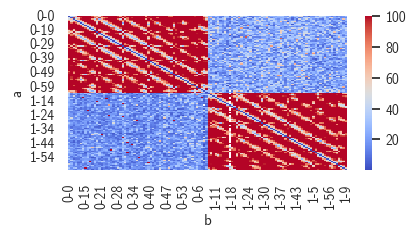

In [9]:
sns.heatmap(
    data=results_2d, fmt=".2f", cmap="coolwarm", vmax=100
)

/var/folders/2f/b2y6thfs2051_m0fs57vb_sc0000gn/T/ipykernel_52709/1085386561.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.ecdfplot(data=results, x="diff", palette=pal)


[None]

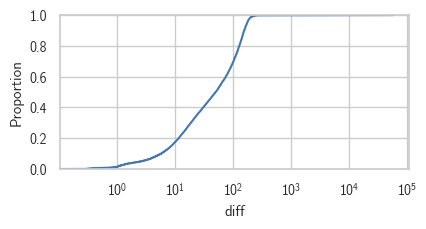

In [11]:
g = sns.ecdfplot(data=results, x="diff", palette=pal)
g.set(xscale="log")